In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import torch
from torchvision import transforms
from PIL import Image
import json

## Getting the respective data into a data frame

In [2]:
# Define the relative path to the JSON file
json_files = ['../coco2017/annotations/captions_train2017.json', '../coco2017/annotations/captions_val2017.json']

# Load the JSON file
training_data = json.load(open(json_files[0]))
validation_data = json.load(open(json_files[1]))

# Extrct images from the JSON file
training_images = training_data['images']
validation_images = validation_data['images']

# Convert the JSON file to a DataFrame
training_images_df = pd.DataFrame(training_images)
validation_images_df = pd.DataFrame(validation_images)


## Beginning with the data nomalization

In [27]:
training_images_df.head()

,license,file_name,coco_url,height,width,date_captured,flickr_url,id
0,3,000000391895.jpg,http://images.cocodataset.org/train2017/000000...,360,640,2013-11-14 11:18:45,http://farm9.staticflickr.com/8186/8119368305_...,391895
1,4,000000522418.jpg,http://images.cocodataset.org/train2017/000000...,480,640,2013-11-14 11:38:44,http://farm1.staticflickr.com/1/127244861_ab0c...,522418
2,3,000000184613.jpg,http://images.cocodataset.org/train2017/000000...,336,500,2013-11-14 12:36:29,http://farm3.staticflickr.com/2169/2118578392_...,184613
3,3,000000318219.jpg,http://images.cocodataset.org/train2017/000000...,640,556,2013-11-14 13:02:53,http://farm5.staticflickr.com/4125/5094763076_...,318219
4,3,000000554625.jpg,http://images.cocodataset.org/train2017/000000...,640,426,2013-11-14 16:03:19,http://farm5.staticflickr.com/4086/5094162993_...,554625


In [5]:
# Normalize the image size to 256x256
def normalize_image_size(image):
    image = cv2.resize(image, (256, 256))
    # normalize the image
    # image = image / 255.0
    return image

(256, 256, 3)
(256, 256)


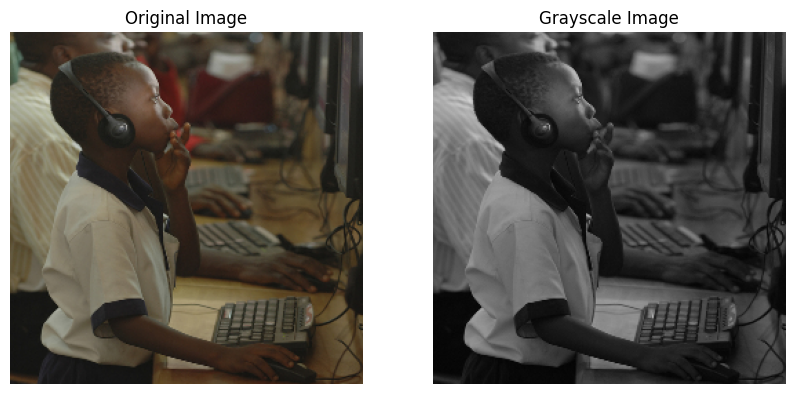

In [6]:
# Load the image
image = cv2.imread('../coco2017/train2017/000000318219.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
# gray = cv2.cvtColor(gray, cv2.COLOR_GRAY2RGB)

# Normalize the image size
image = normalize_image_size(image)
gray_image = normalize_image_size(gray)
print(image.shape)
print(gray_image.shape)

# Display the image
plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(gray_image, vmax=255, cmap='gray')

plt.title('Grayscale Image')
plt.axis('off')

plt.show()